<a href="https://colab.research.google.com/github/shaynyx/marvel-level-2/blob/main/task_7_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering for Image Classification

A cluster refers to a collection of data points aggregated together because of certain similarities.

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

 The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

It halts creating and optimizing clusters when either:

The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 640x480 with 0 Axes>

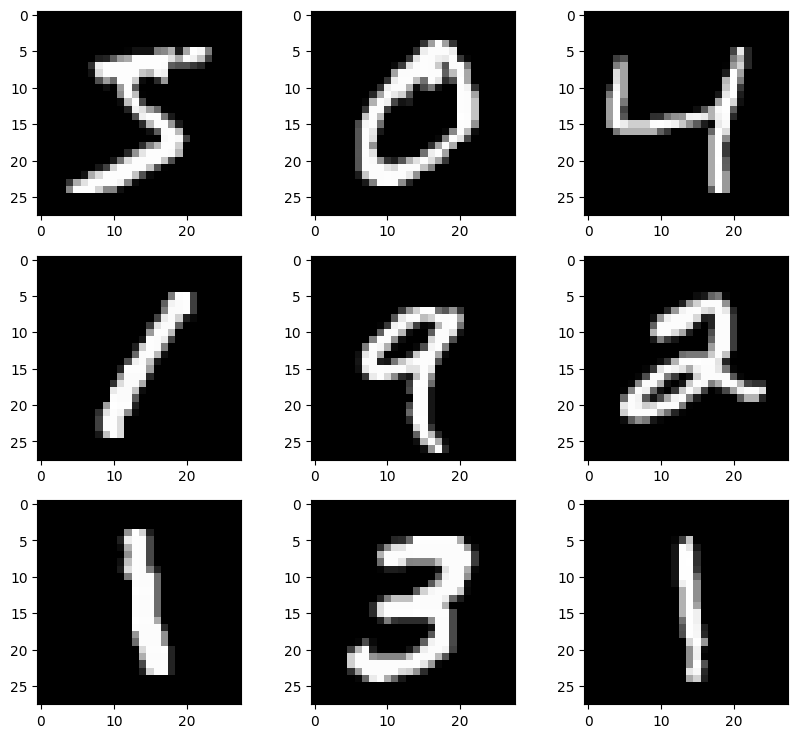

In [8]:
import matplotlib.pyplot as plt

plt.gray() # B/W Images
plt.figure(figsize = (10,9))
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [6]:
for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [9]:
print(x_train.min())
print(x_train.max())

0
255


Since the dataset contains a range of values from **0 to 255**, the dataset has to be normalized. **Data Normalization** is an important preprocessing step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This fastens the process of covergence while training the model. Also Normalization makes sure no one particular parameter influences the output significantly.

Data normalization is done by subtracting the mean from each pixel and then dividing the result by the standard deviation. The distribution of such data would resemble a Gaussian curve centered at zero.

For image inputs we need the pixel numbers to be positive. So the image input is divided by 255 so that input values are in range of [0,1].

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
# The minimum and maximum values are 0 and 1 respectively. The input data is in range of [0,1].

print(x_train.min())
print(x_train.max())

0.0
1.0


In [13]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

After reshaping, each row of the new 2D array represents a flattened version of an original image. The number of columns in the reshaped array is equal to the total number of pixels in each image (height * width). This is necessary for K-Means Clustering, as it treats each pixel as an independent feature during clustering.

In [14]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [23]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_train))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)
print(total_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10


In [18]:
def retrieve_info(cluster_labels, y_train):
    # Initializing
    reference_labels = {}

    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i, 1, 0)
        num = np.bincount(y_train[index == 1]).argmax()
        reference_labels[i] = num

    return reference_labels


kmeans.labels_: [0, 1, 1, 0, 2] (Cluster labels assigned by K-Means)


reference_labels: {0: 3, 1: 8, 2: 5} (Mapping of cluster labels to most common true labels)


After the loop, the number_labels array would be assigned true labels based on the cluster labels:

For data point 0 with cluster label 0, number_labels[0] = reference_labels[0] = 3.

For data point 1 with cluster label 1, number_labels[1] = reference_labels[1] = 8.

For data point 2 with cluster label 1, number_labels[2] = reference_labels[1] = 8.

For data point 3 with cluster label 0, number_labels[3] = reference_labels[0] = 3.

For data point 4 with cluster label 2, number_labels[4] = reference_labels[2] = 5.

The resulting number_labels array might look like [3, 8, 8, 3, 5]. These values are the inferred true labels based on the mapping provided by reference_labels and the cluster labels assigned by K-Means.

In [21]:
from sklearn.metrics import accuracy_score

kmeans = MiniBatchKMeans(n_clusters = 256)
# Fitting the model to testing set
kmeans.fit(X_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):

 number_labels[i] = reference_labels[kmeans.labels_[i]]

print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy score : 0.9018


